                
                                           
                                            **TASK 1 - DATA EXPLORATION AND PREPARATION - 4 marks**


Dataset name:

Intel Image Classification dataset



Understanding Dataset:

The Intel Image Classification dataset is a collection of over 25,000 natural images categorized into six classes: buildings, forest, glacier, mountain, sea, and street. It is commonly used for training and testing image classification models in computer vision. The dataset is organized into folder-based categories, with separate train and test folders for model training and evaluation. Each class folder contains images in .jpg format with varying sizes and resolutions, which typically need to be resized for model input. This dataset provides a valuable resource for educational and research purposes in developing and testing image classification algorithms.



Dataset question:

Classify the image into either: building, forest, glacier, mountain, sea, street


**<u>1.1 EXPLORATION</u>**

1. (1 mark) Assign the list of available classes to a variable with name CLASS_NAMES. For each class name, display one image and print the dimensions of the corresponding numpy array.

In [18]:
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [19]:
import keras
keras.__version__

'3.4.1'

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
!cp /content/drive/MyDrive/intel_images.zip /content/


In [23]:
import zipfile

with zipfile.ZipFile('intel_images.zip', 'r') as zip_ref:
    zip_ref.extractall()

Available Classes: ['street', 'mountain', 'buildings', 'glacier', 'sea', 'forest']
length of class: 2382


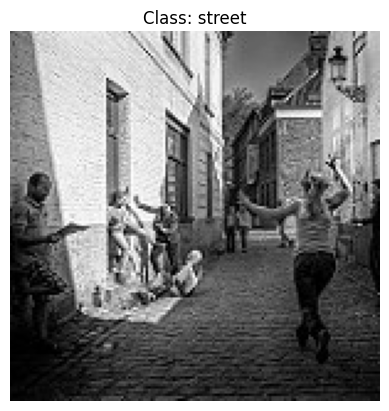

Dimensions of street image: (150, 150, 3)
length of class: 2512


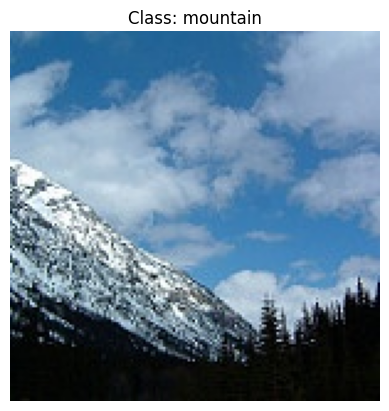

Dimensions of mountain image: (150, 150, 3)
length of class: 2191


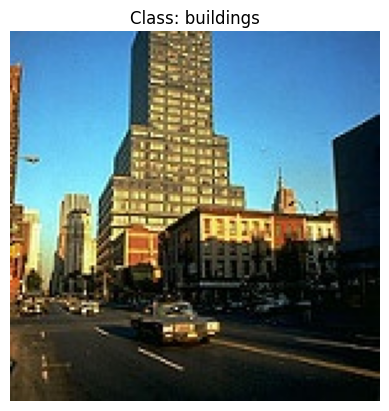

Dimensions of buildings image: (150, 150, 3)
length of class: 2404


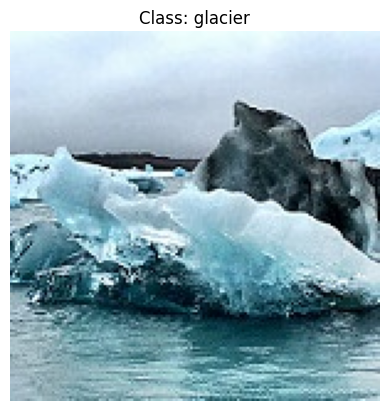

Dimensions of glacier image: (150, 150, 3)
length of class: 2274


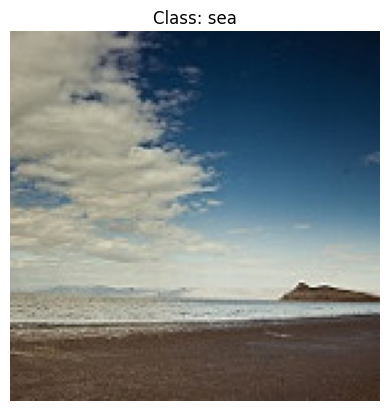

Dimensions of sea image: (150, 150, 3)
length of class: 2271


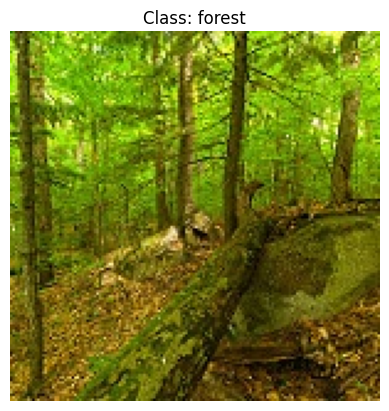

Dimensions of forest image: (150, 150, 3)


In [24]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

#  Define the path to your dataset
dataset_path = '/content/seg_train/seg_train'  # Change this to your dataset's path

#  List all available classes (directories)
CLASS_NAMES = os.listdir(dataset_path)  # This will list all subdirectory names
print("Available Classes:", CLASS_NAMES)

#  For each class, display one image and print its dimensions
for class_name in CLASS_NAMES:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):  # Ensure it is a directory (class)
        # List all images in the class directory
        image_files = os.listdir(class_path)
        print("length of class:", len(image_files))
        if image_files:  # Check if there are images available
            # Select the first image
            image_path = os.path.join(class_path, image_files[0])
            # Open the image using PIL
            image = Image.open(image_path)
            # Convert the image to a NumPy array
            image_array = np.array(image)

            # Display the image
            plt.imshow(image)
            plt.title(f"Class: {class_name}")
            plt.axis('off')  # Hide axes
            plt.show()

            # Print the dimensions of the image (Height, Width, Channels)
            print(f"Dimensions of {class_name} image: {image_array.shape}")


2. (1 mark) Determine the number of images in the training and test sets for each class name. Are there any significant differences between the proportions of images in the training and test sets?

In [25]:

dataset_path_train = '/content/seg_train/seg_train'  # Change this to your dataset's path
dataset_path_test= '/content/seg_test/seg_test'


# Step 2: List all available classes (directories)
CLASS_NAMES_train = os.listdir(dataset_path_train)  # This will list all subdirectory names
print("Available Train Classes:", CLASS_NAMES_train)

CLASS_NAMES_test = os.listdir(dataset_path_test)  # This will list all subdirectory names
print("Available Test Classes:", CLASS_NAMES_test)

# Step 3: For each class, display one image and print its dimensions
for class_name_train in CLASS_NAMES_train:
    class_path_train = os.path.join(dataset_path_train, class_name_train)
    if os.path.isdir(class_path_train):  # Ensure it is a directory (class)
        # List all images in the class directory
        image_files_train = os.listdir(class_path_train)
        print("train_length of",class_name_train, len(image_files_train))


# Step 3: For each class, display one image and print its dimensions
for class_name_test in CLASS_NAMES_test:
    class_path_test = os.path.join(dataset_path_test, class_name_test)
    if os.path.isdir(class_path_test):  # Ensure it is a directory (class)
        # List all images in the class directory
        image_files_test = os.listdir(class_path_test)
        print("test_length of",class_name_test, len(image_files_test))


Available Train Classes: ['street', 'mountain', 'buildings', 'glacier', 'sea', 'forest']
Available Test Classes: ['street', 'mountain', 'buildings', 'glacier', 'sea', 'forest']
train_length of street 2382
train_length of mountain 2512
train_length of buildings 2191
train_length of glacier 2404
train_length of sea 2274
train_length of forest 2271
test_length of street 501
test_length of mountain 525
test_length of buildings 437
test_length of glacier 553
test_length of sea 510
test_length of forest 474


**<u>1.2 PREPARATION (2 marks)</u>**

Use TensorFlow's image_dataset_from_directory to generate datasets for training, validation, and test. Make sure that you set the following options:

    - Image size: 150 x 150 and 3 channels
    - Colour mode = RGB
    - Shuffle = True
    - Seed = 1234
    - Labels = inferred
    - Class names = CLASS_NAMES
    - Label mode = int or categorical (your choice)
    - Batch size = 32

The other options can be left to their defaults.

   -  use seg_train and specify a validation split of 0.2 for validation and training. (hint: use the options validation_split and subset.
   - use seg_test, to generate testing data

In [26]:

# Define the paths to your directories
train_dir = '/content/seg_train/seg_train/'
test_dir = '/content/seg_test/seg_test/'

# Define parameters
IMG_SIZE = (150, 150)  # Image size
BATCH_SIZE = 32
SEED = 1234  # Seed for reproducibility

# List class names from the directory (inferred automatically by image_dataset_from_directory)
CLASS_NAMES = sorted(os.listdir(train_dir))  # Ensures class names are in a sorted order
print("Class Names:", CLASS_NAMES)

# Generate training dataset with 80% of data
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='rgb',  # Use RGB images
    shuffle=True,  # Shuffle the dataset
    label_mode='int',  # Use integer labels; change to 'categorical' for one-hot encoded labels
    class_names=CLASS_NAMES  # Use class names as inferred from directory structure
)

# Generate validation dataset with 20% of data
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='rgb',  # Use RGB images
    shuffle=True,  # Shuffle the dataset
    label_mode='int',  # Use integer labels; change to 'categorical' for one-hot encoded labels
    class_names=CLASS_NAMES  # Use class names as inferred from directory structure
)

# Generate test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='rgb',  # Use RGB images
    shuffle=True,  # Shuffle the dataset
    label_mode='int',  # Use integer labels; change to 'categorical' for one-hot encoded labels
    class_names=CLASS_NAMES  # Use class names as inferred from directory structure
)

# Normalize the datasets between 0 and 1
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))


Class Names: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.
Found 3000 files belonging to 6 classes.


                          **TASK 2  - A SIMPLE CLASSIFER (6 marks)**

  **<u>2.1 First classifier (2 marks)</u>**

Create a simple classifier that has the following layers:

   -  A Flatten layer.
   -  The output layer with the correct size and activation function for this classification task, this would be 6.


   Train the model with training data and use20% of the training data to determine when to stop.


In [29]:

import tensorflow as tf
import keras
from keras import  layers, models, callbacks


# Assume train_dataset, val_dataset, and test_dataset are already created and normalized as explained earlier

# Determine the number of classes from the training dataset
num_classes = len(CLASS_NAMES)

# Step 1: Define the Model Architecture
model = models.Sequential([
    # Flatten layer to convert 2D image to 1D vector
    layers.Flatten(input_shape=(150, 150, 3)),  # Input shape matches the image size and channels
    # Output layer with num_classes units and softmax activation for multi-class classification
    layers.Dense(num_classes, activation='softmax')  # Use 'sigmoid' if you have binary classification
])

# Step 2: Compile the Model
model.compile(
    optimizer='adam',  # Use Adam optimizer
    loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
    metrics=['accuracy']  # Report accuracy during training and evaluation
)

# Step 3: Train the Model with Early Stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,  # Set a large number of epochs; training will stop early if no improvement
    callbacks=[early_stopping]  # Use EarlyStopping to stop training when validation loss does not improve
)

# Step 4: Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3368 - loss: 7.2030 - val_accuracy: 0.3845 - val_loss: 4.2468
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.4265 - loss: 4.2087 - val_accuracy: 0.3913 - val_loss: 4.2218
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.4423 - loss: 4.0589 - val_accuracy: 0.4544 - val_loss: 3.1940
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.4918 - loss: 3.3722 - val_accuracy: 0.4551 - val_loss: 2.6476
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.4964 - loss: 2.9046 - val_accuracy: 0.4027 - val_loss: 3.9810
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5199 - loss: 2.8041 - val_accuracy: 0.2701 - val_loss: 8.2870
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.4986 - loss: 3.3868 - val_accuracy: 0.4743 - val_loss: 5.7318
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4453 - loss: 2.7672
Test Accuracy: 0.45


In [28]:
!pip3 install keras-tuner -q
import kerastuner as kt

**<u>2.2 A more complex classifier (2 marks)</u>**

Try a more complex architecture that has 1 or more hidden layers with dropout. For this more complex architecture, use keras-tuner and run it with a reasonable choice of possible parameters. You may try among the following:

    - Number of hidden layers
    - Sizes of hidden layers
    - Dropout rate
    - Learning rate



In [16]:


# Step 1: Define a HyperModel
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(150, 150, 3)))  # Flatten layer to convert 2D image to 1D vector

    # Step 2: Tune the number of hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):  # Tune between 1 and 3 hidden layers
        # Step 3: Tune the size of each hidden layer
        model.add(layers.Dense(
            units=hp.Int('units_' + str(i), min_value=32, max_value=256, step=32),  # Tune the size of hidden layer
            activation='relu'
        ))
        # Step 4: Tune the dropout rate
        model.add(layers.Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.1, max_value=0.5, step=0.1)))  # Tune dropout rate

    # Output layer with num_classes units and softmax activation for multi-class classification
    model.add(layers.Dense(len(CLASS_NAMES_train), activation='softmax'))

    # Step 5: Tune the learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Step 6: Set Up Hyperparameters Search Space
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=15,
    factor=3,
    directory='my_dir',
    project_name='image_classifier_tuning'
)

# Step 7: Define Early Stopping to Avoid Overfitting
stop_early = callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Step 8: Search for the Best Hyperparameters
tuner.search(train_dataset, validation_data=val_dataset, epochs=20, callbacks=[stop_early])

# Step 9: Get the Best Hyperparameters and Build the Best Model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Best hyperparameters:
- Number of hidden layers: {best_hps.get('num_layers')}
- Hidden layer sizes: {[best_hps.get('units_' + str(i)) for i in range(best_hps.get('num_layers'))]}
- Dropout rates: {[best_hps.get('dropout_' + str(i)) for i in range(best_hps.get('num_layers'))]}
- Learning rate: {best_hps.get('learning_rate')}
""")

# Step 10: Train the Best Model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    callbacks=[stop_early]
)

# Step 11: Evaluate the Best Model on the Test Data
test_loss, test_accuracy = best_model.evaluate(test_dataset)
print(f"Test Accuracy of the Best Model: {test_accuracy:.2f}")



Trial 30 Complete [00h 02m 10s]
val_accuracy: 0.5203136205673218

Best val_accuracy So Far: 0.5477548241615295
Total elapsed time: 00h 23m 00s

Best hyperparameters:
- Number of hidden layers: 3
- Hidden layer sizes: [224, 224, 64]
- Dropout rates: [0.1, 0.30000000000000004, 0.1]
- Learning rate: 0.0001357472243932813

Epoch 1/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.2588 - loss: 1.9950 - val_accuracy: 0.4241 - val_loss: 1.4078
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.4148 - loss: 1.4855 - val_accuracy: 0.4825 - val_loss: 1.3361
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.4318 - loss: 1.4262 - val_accuracy: 0.4979 - val_loss: 1.3204
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.4592 - loss: 1.3738 - val_accuracy: 0.4939 - val_loss: 1.3136
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4582 - loss: 1.3659 - val_accuracy: 0.4608 - val_loss: 1.3660
Epoch 6/20
351/351 ━━━━━━━━━━━

**<u>2.3 Error analysis (2 marks)</u>**

Evaluate your best-performing system from task 2.2 against the system of task 2.1.


Question: Which system had a better accuracy on the test data?

    The system that provides the best accuracy is from task 2.2, which presents an accuracy of 0.51 as compared to the 0.45 accuracy of task 2.1.

Question: Which system had a lower degree of overfitting?

    During training, the model is optimized to minimize the loss on the training data. The training loss typically decreases over time as the model learns to better predict the training data.
    The validation loss, however, indicates how well the model generalizes to unseen data. In the beginning, both training and validation losses usually decrease. But if the model starts to overfit, it memorizes the specific details and noise of the training data rather than learning general patterns. This leads to a continuous decrease in training loss, while the validation loss starts increasing or stops decreasing.
    This divergence happens because the model's parameters are tuned too much to the training data, and it fails to perform well on new data that doesn’t follow the exact patterns of the training set. Hence, the point where validation loss starts increasing while training loss decreases marks the onset of overfitting.

Training Accuracy vs. Validation Accuracy:

    A similar concept applies to accuracy. Training accuracy generally improves as the model becomes better at predicting the training data. However, once overfitting occurs, validation accuracy will plateau or decrease while training accuracy keeps improving. This is because the model is learning to perfectly predict the training data, including noise or specific details that are not representative of the overall data distribution. The model's inability to generalize beyond the training data results in a poor performance on validation data, which is evident from the drop or stagnation in validation accuracy.



  Analysis:
  Model 1 Analysis:

    Training and Validation Trends:
        Initial epochs show a decrease in both training loss and validation loss, with training accuracy gradually increasing.
        However, from around Epoch 5, validation loss increases significantly (e.g., jumping from 2.6476 to 3.9810, then to 8.2870), while training loss continues to decrease or fluctuates around the same level.
        Similarly, validation accuracy deteriorates after Epoch 4 (e.g., dropping to 0.2701 by Epoch 6) while training accuracy remains relatively stable or improves slightly.
    Degree of Overfitting:
        The divergence between the training loss and validation loss, as well as between training accuracy and validation accuracy, indicates that Model 1 is significantly overfitting. The validation performance degrades sharply after a few epochs, suggesting the model memorizes the training data rather than learning general patterns.

Model 2 Analysis:

    Training and Validation Trends:
        Both training and validation loss decrease steadily during the initial epochs, and the model achieves a higher and more stable validation accuracy compared to Model 1.
        Validation accuracy reaches up to 0.5289 (Epoch 15), and the validation loss remains fairly consistent (e.g., fluctuating between 1.2462 and 1.3660), indicating that the model generalizes relatively well to unseen data.
        Even toward the later epochs, the validation loss does not increase significantly, and the validation accuracy remains relatively stable, showing only minor fluctuations.
    Degree of Overfitting:
        Model 2 shows less overfitting than Model 1. The gap between training and validation metrics is smaller, and both losses and accuracies for training and validation are more aligned. This suggests the model is better at generalizing to unseen data.

Conclusion:

    Model 2 had a lower degree of overfitting compared to Model 1. While Model 1 exhibits a large divergence between training and validation loss and accuracy after a few epochs, Model 2 maintains a more consistent and smaller gap between training and validation metrics throughout the training process. Model 2’s stability in validation performance indicates better generalization to new data.

                                          **Task 3 - A more complex classifier (6 marks)**

**<u>Task 3.1 Using ConvNets (2 marks)</u>**

Implement a model that uses a sequence of at least two ConvD, each one followed with MaxPooling2D. Use reasonable numbers for the hyperparameters (number of filters, kernel size, pool size, activation, etc), and justify your choice.

Model Architecture Design

    - Input Layer: The input shape should match the size of the images (150x150 with 3 color channels for RGB).

    - Convolutional Layers (Conv2D): These layers apply a number of convolutional filters to the input image, enabling the network to learn various spatial features like edges, textures, and shapes.Typically, we start with a smaller number of filters and increase them as we go deeper into the network.
    
    - Common choices for kernel size are (3, 3) or (5, 5). Smaller kernel sizes capture fine details, while larger ones can capture more contextual information.
    
    - Activation: We use ReLU ('relu') activation for non-linearity, which helps the model learn complex patterns.

    - Pooling Layers (MaxPooling2D): These layers are used to downsample the feature maps from the convolutional layers, reducing their spatial dimensions and the number of parameters while preserving the most important features. Common pool size is (2, 2).
    
    - Flatten Layer: Converts the 2D output from the convolutional layers into a 1D feature vector.
    
    - Fully Connected (Dense) Layers: Used for classification. The number of units in the final dense layer matches the number of classes in the dataset.
    
    - Output Layer: Uses softmax activation for multi-class classification.
    
    
    - Number of Filters: Starting with 32 filters and increasing to 64 or 128 as we go deeper. This allows the model to learn a hierarchy of increasingly complex features.
    
    
    - Kernel Size: A kernel size of (3, 3) is a common default that balances feature resolution and computational efficiency.
    
    - Pooling Size: A pool size of (2, 2) is effective for downsampling while retaining important spatial information.
    
    - Activation Function: ReLU is widely used in CNNs for its ability to introduce non-linearity without vanishing gradient issues.

In [30]:

import tensorflow as tf
from tensorflow.keras import layers, models

# Assume train_dataset, val_dataset, and test_dataset are already created and normalized

# Step 1: Define the Model Architecture
model = models.Sequential([
    # First Conv2D layer with 32 filters, kernel size 3x3, activation ReLU
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    # First MaxPooling layer with pool size 2x2
    layers.MaxPooling2D((2, 2)),

    # Second Conv2D layer with 64 filters, kernel size 3x3, activation ReLU
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Second MaxPooling layer with pool size 2x2
    layers.MaxPooling2D((2, 2)),

    # Third Conv2D layer with 128 filters, kernel size 3x3, activation ReLU
    layers.Conv2D(128, (3, 3), activation='relu'),
    # Third MaxPooling layer with pool size 2x2
    layers.MaxPooling2D((2, 2)),

    # Flatten the feature map to 1D for the dense layers
    layers.Flatten(),
    # Fully connected layer with 128 units and ReLU activation
    layers.Dense(128, activation='relu'),
    # Output layer with number of classes and softmax activation
    layers.Dense(len(CLASS_NAMES), activation='softmax')
])

# Step 2: Compile the Model
model.compile(
    optimizer='adam',  # Adam optimizer for adaptive learning rate
    loss='sparse_categorical_crossentropy',  # Suitable for multi-class classification with integer labels
    metrics=['accuracy']  # Use accuracy as the metric for evaluation
)

# Step 3: Train the Model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,  # Set a reasonable number of epochs
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]  # Early stopping
)

# Step 4: Evaluate the Model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


351/351 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.5326 - loss: 1.1686 - val_accuracy: 0.6796 - val_loss: 0.8158
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.7481 - loss: 0.6904 - val_accuracy: 0.7662 - val_loss: 0.6272
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.8177 - loss: 0.5136 - val_accuracy: 0.7876 - val_loss: 0.5793
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8707 - loss: 0.3740 - val_accuracy: 0.7922 - val_loss: 0.6344
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.9041 - loss: 0.2677 - val_accuracy: 0.7912 - val_loss: 0.6929
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9410 - loss: 0.1746 - val_accuracy: 0.7844 - val_loss: 0.7886
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7886 - loss: 0.5980
Test Accuracy: 0.79


**<u> Task 3.2: Using pre-trained models (2 marks) </u>**

MobileNet, pre-trained on imagenet as discussed in the lectures. Add the correct classification layer, and train it with your data.

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications, callbacks

# Assume train_dataset, val_dataset, and test_dataset are already created and normalized as explained earlier

# Step 1: Load the Pre-trained MobileNet Model without the top layer
base_model = applications.MobileNet(
    input_shape=(150, 150, 3),  # Input shape for MobileNet
    include_top=False,  # Do not include the top fully connected layer
    weights='imagenet'  # Load weights pre-trained on ImageNet
)

# Step 2: Freeze the Base Model Weights
base_model.trainable = False

# Step 3: Add a New Classification Head
model = models.Sequential([
    base_model,  # Add the pre-trained MobileNet base model
    layers.GlobalAveragePooling2D(),  # Pooling layer to reduce dimensionality
    layers.Dense(128, activation='relu'),  # Add a dense layer for learning
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(len(CLASS_NAMES), activation='softmax')  # Output layer with softmax for multi-class classification
])

# Step 4: Compile the Model
model.compile(
    optimizer='adam',  # Adam optimizer
    loss='sparse_categorical_crossentropy',  # Sparse categorical crossentropy loss for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

# Step 5: Define Early Stopping to Avoid Overfitting
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 6: Train the Model with the New Classification Head
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,  # Set a reasonable number of epochs
    callbacks=[early_stopping]
)

# Step 7: Evaluate the Model on the Test Data
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.2f}")


<ipython-input-32-1a9dc59f1e84>:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = applications.MobileNet(


Epoch 1/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.7690 - loss: 0.6715 - val_accuracy: 0.8931 - val_loss: 0.2855
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.8915 - loss: 0.3037 - val_accuracy: 0.8956 - val_loss: 0.2759
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9011 - loss: 0.2711 - val_accuracy: 0.8942 - val_loss: 0.2713
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9146 - loss: 0.2331 - val_accuracy: 0.9031 - val_loss: 0.2669
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9216 - loss: 0.2160 - val_accuracy: 0.9016 - val_loss: 0.2827
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9278 - loss: 0.1930 - val_accuracy: 0.8981 - val_loss: 0.2830
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9338 - loss: 0.1798 - val_accuracy: 0.9041 - val_loss: 0.2740
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9393 - loss: 0.1679 - val

**<u> Task 3.3 Comparative evaluation (2 marks) </u>**


Compare evaluation results form tasks 3.1 and 3.2

1. Display the confusion matrix generated by the best system on the test set. For this you can use, for example, TensorFlow's confusion_matrix.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Obtain Predictions from the Model
# Predict the classes for the test dataset
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Step 2: Obtain True Labels from the Test Dataset
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Step 3: Generate the Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Step 4: Plot the Confusion Matrix using Matplotlib and Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_dataset.class_names,
            yticklabels=test_dataset.class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Optionally, print a classification report for more detailed metrics
print(classification_report(y_true, y_pred_classes, target_names=CLASS_NAMES))

NameError: name 'model' is not defined

2. Identify the most commont type of classification error reported by the confusion matrix, and display 5 images from the test set that have this classification error.
    Side note:  image_dataset_from_directory shuffles the samples each time you complete an epoch. You need to figure out how to retrieve the data, labels, and generate predictions, without saving the entire data in memory

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assume model and test_dataset are already defined

# Step 1: Predict the classes for the test dataset
y_pred = []
y_true = []

for images, labels in test_dataset:
    preds = model.predict_on_batch(images)  # Predict on batch without storing in memory
    y_pred.extend(np.argmax(preds, axis=1))  # Convert predictions to class labels
    y_true.extend(labels.numpy())  # Retrieve true labels

# Convert lists to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# Step 2: Generate the Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix to identify the most common error
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_dataset.class_names,
            yticklabels=test_dataset.class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Step 3: Identify the most common classification error
# Find the indices of the maximum value off-diagonal in the confusion matrix
# (i.e., where the predicted label does not match the true label)
max_error_index = np.unravel_index(np.argmax(conf_matrix - np.eye(len(test_dataset.class_names)) * np.max(conf_matrix)), conf_matrix.shape)
true_label_index, predicted_label_index = max_error_index

print(f"Most common misclassification: True Label = '{test_dataset.class_names[true_label_index]}', Predicted Label = '{test_dataset.class_names[predicted_label_index]}'")


In [ ]:
# Step 4: Display 5 Images from the Test Set with the Most Common Error
import matplotlib.pyplot as plt

# Set up variables to track misclassified images
misclassified_indices = np.where((y_true == true_label_index) & (y_pred == predicted_label_index))[0]

# Limit to a maximum of 5 images
num_images_to_display = min(5, len(misclassified_indices))

# Display images
plt.figure(figsize=(15, 15))

for i, idx in enumerate(misclassified_indices[:num_images_to_display]):
    # Locate the batch and image index within the batch
    batch_index = idx // test_dataset.batch_size
    image_index = idx % test_dataset.batch_size

    # Fetch the batch
    batch = list(test_dataset.take(batch_index + 1))[-1]  # Fetch the (batch_index+1)-th batch
    images, labels = batch

    # Display the misclassified image
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(images[image_index].numpy().astype("uint8"))
    plt.title(f"True: {test_dataset.class_names[true_label_index]}\nPred: {test_dataset.class_names[predicted_label_index]}")
    plt.axis('off')

plt.show()
